In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Dataset taken from kaggle

In [63]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Imbalanced Data Set

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Exploratory Data Analysis**

In [65]:
data.isnull().values.any()

False

#no null values

# Checking transaction distribution w/countplot

In [66]:
import seaborn as sns

In [67]:
from pylab import rcParams
rcParams['figure.figsize']=8,5

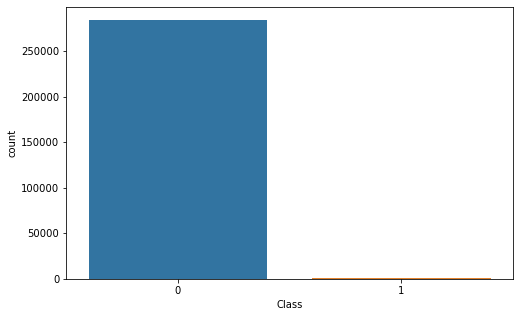

In [68]:

import seaborn as sns
sns.countplot(data=data, x='Class')

#clearly dataset is imbalanced

In [69]:
classes = data['Class'].value_counts()
classes[0],classes[1]
print("No of Valid cases in the dataset: ",classes[0])
print("No of Fraud cases in the dataset: ",classes[1])

No of Valid cases in the dataset:  284315
No of Fraud cases in the dataset:  492


#data.shape[0] returns no of rows.
#data.shape[1] returns no of columns.

In [70]:
y = (classes[0]/data.shape[0])*100
z = (classes[1]/data.shape[0])*100


print("Percentage of valid cases: ",y)
print("Percentage of fraud cases: ",z)

Percentage of valid cases:  99.82725143693798
Percentage of fraud cases:  0.1727485630620034


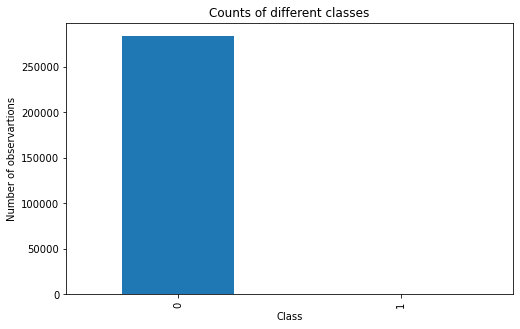

In [71]:
import matplotlib.pyplot as plt 
classes.plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Number of observartions")
plt.title("Counts of different classes")
plt.show()

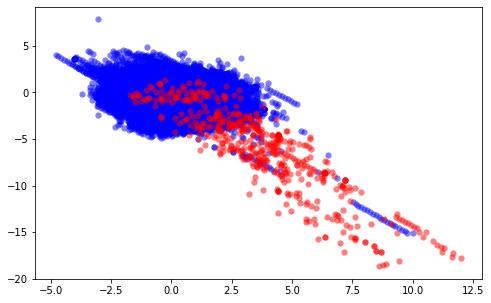

In [72]:
# Comparison between fraud and non-fraud cases
plt.scatter(data.loc[data['Class'] == 0]['V11'], data.loc[data['Class'] == 0]['V12'],label='Class #0', alpha=0.5, linewidth=0.15,c='b')
plt.scatter(data.loc[data['Class'] == 1]['V11'], data.loc[data['Class'] == 1]['V12'],label='Class #1', alpha=0.5, linewidth=0.15,c='r')
plt.show()

In [73]:
X = data.drop(['Class'],axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [74]:
#creating fraud & normal dataset 

fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [75]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


# #Analysing difference in amount of money in b/w both the classes

In [76]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [77]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Plotting Amount v/s Transactions for both the transactions type

[Text(0, 0.5, 'Number of Normal Transactions'), Text(0.5, 0, 'Amount ($)')]

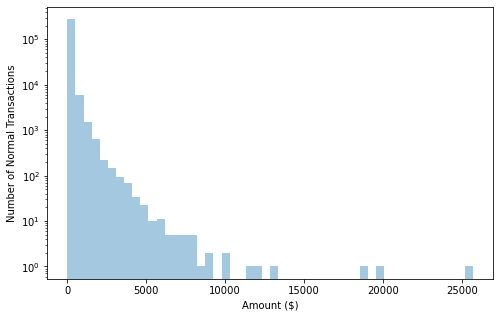

In [78]:
plot_normal=sns.distplot(normal['Amount'],kde=False,bins=50)
plot_normal.set(yscale='log')
plot_normal.set(xlabel='Amount ($)',ylabel='Number of Normal Transactions')

[Text(0, 0.5, 'Number of Fraud Transactions'), Text(0.5, 0, 'Amount ($)')]

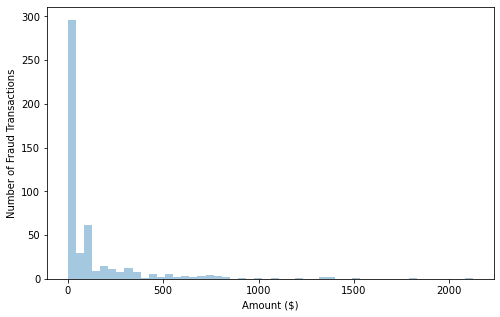

In [79]:
plot_fraud=sns.distplot(fraud['Amount'],kde=False,bins=50)
plot_fraud.set(xlabel='Amount ($)',ylabel='Number of Fraud Transactions')

#clearly for fraud transactions, transactions amount is small as compared to normal ones

#checking Do fraudulent transactions occur more often during certain time frame?

# Plotting Amount v/s Transactions for both the transactions type

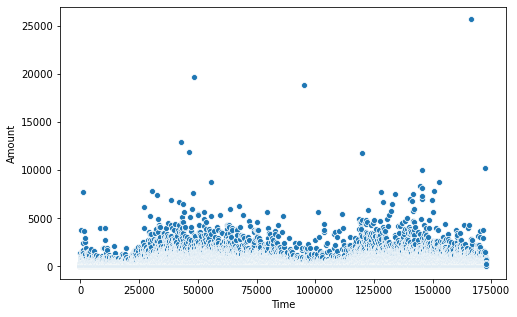

In [80]:

sns.scatterplot(data=normal,x='Time',y='Amount')

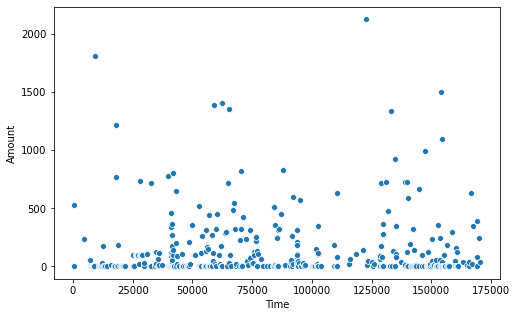

In [81]:

sns.scatterplot(data=fraud, x='Time', y='Amount')

#seems no relation b/w fraud transaction and certain time period

# Creating Features and Labels

In [82]:
columns=data.columns.tolist()

state=np.random.RandomState(42)

columns=[c for c in columns if c not in ["Class"]]
target = "Class"
X=data[columns]
y=data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3)

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(85442, 30)
(85442,)
(199365, 30)
(199365,)


# Logistic Regression On Imbalanced Dataset

In [85]:
from sklearn.linear_model import LogisticRegression
model_lr1=LogisticRegression()

In [86]:
model_lr1.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [87]:
lr1_probas = model_lr1.predict_proba(X_test)

In [88]:
model_lr1.score(X_test, y_test)

0.9990620219195947

In [89]:
#Making predictions for test set
predictions = model_lr1.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.76      0.67      0.71       349

    accuracy                           1.00    199365
   macro avg       0.88      0.84      0.86    199365
weighted avg       1.00      1.00      1.00    199365



We achieved a good Accuracy of nearly 99.99% accuracy But predicting Fradulent cases F1 score is not Good (0.69). So we have to first Balance the dataset then apply Logistic regression

# Handling imbalanced dataset using undersampling (for log_reg)

In [91]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,y)

In [92]:
X_res.shape,y_res.shape

((984, 30), (984,))


# Model Prediction

# Applying Logistic Regression After Undersampling Dataset

In [93]:
import sklearn


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.3)

In [95]:
y_res_test=y_test
X_res_test=X_test

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(295, 30)
(295,)
(689, 30)
(689,)


In [97]:

model_lr=LogisticRegression()

In [98]:
model_lr.fit(X_res,y_res)

LogisticRegression()

In [99]:
model_lr.score(X_test, y_test)

0.9608127721335269

In [100]:
lr_probas = model_lr.predict_proba(X_test)

In [101]:
y_pred=model_lr.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[347   8]
 [ 19 315]]


147669 + 313 are correctly predicted as we can see in confusion matrix

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(295, 30)
(295,)
(689, 30)
(689,)


In [104]:
#Making predictions for test set
predictions = model_lr.predict(X_test)
predictions[:500]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(295, 30)
(295,)
(689, 30)
(689,)


In [106]:
predictions = model_lr.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       355
           1       0.98      0.94      0.96       334

    accuracy                           0.96       689
   macro avg       0.96      0.96      0.96       689
weighted avg       0.96      0.96      0.96       689



Here We achieved a good accuracy of 95.93% as well as good F1 score 0.96 for predicting fraudulent cases

# RAndom Forest

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model_rf=RandomForestClassifier(n_estimators=50)

In [111]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [112]:
model_rf.score(X_test,y_test)

0.9994281844857422

In [113]:
rf_probas = model_rf.predict_proba(X_test)

In [114]:
y_pred=model_rf.predict(X_test)

In [115]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[198985     28]
 [    86    266]]


> 198987 + 263 are correctly predicted as we can see in confusion matrix

In [116]:
#Making predictions for test set
predictions = model_rf.predict(X_test)
predictions[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [117]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199013
           1       0.90      0.76      0.82       352

    accuracy                           1.00    199365
   macro avg       0.95      0.88      0.91    199365
weighted avg       1.00      1.00      1.00    199365



Using Random Forest Algorithm We achieved a good accuracy of 99.94% as well as good F1 score 0.82 for predicting fraudulent cases

In [118]:
lr1_probas = model_lr1.predict_proba(X_test)

rf_probas = model_rf.predict_proba(X_test)

In [119]:
probas_list = [lr1_probas, rf_probas]
clf_names = ['Logistic Regression W/o Undersampling' , 'Random Forest']

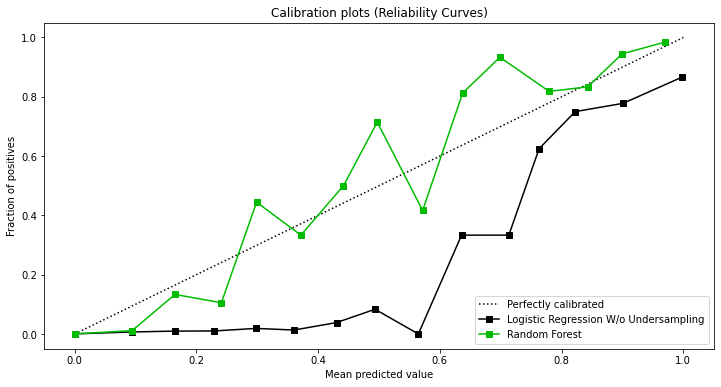

In [120]:
import scikitplot as skplt
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

In [121]:
print(y_res_test.shape)
print(X_res_test.shape)

(689,)
(689, 30)


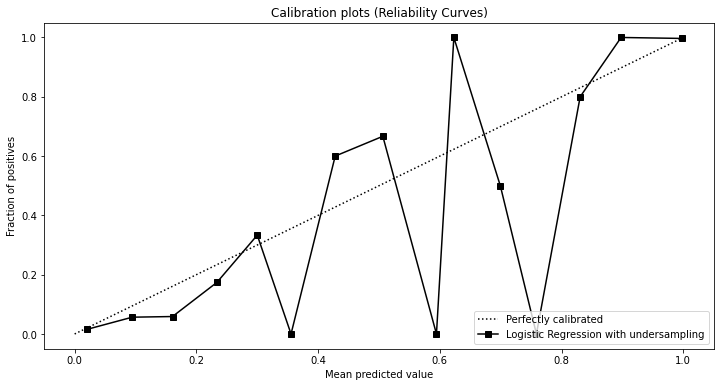

In [122]:
probas_list = [lr_probas]
clf_names = ['Logistic Regression with undersampling']
skplt.metrics.plot_calibration_curve(y_res_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

# Observations :

Random Forest has a 99.94% accurate than Logistic Regression with 94.4% accuracy.
So overall Random Forest Method performed much better in determining the fraud cases.

# Project

Rahul Kasaudhan
